# HW 2 Computer Vision Course 

This assignment is designed to assess your understanding of key concepts in computer vision, image filtering techniques, and edge detection.

**Submission Guidelines:**

- Notebook Submission: Complete your solutions within this notebook file.

- PDF Submission: Export your completed notebook as a PDF and submit it alongside the notebook.

**Important Notes:**

- Submissions without a PDF file will incur a **10% penalty on the total grade**.

- Ensure that your code runs without errors and that all visual outputs are included in the PDF.

- Write clear and concise explanations for your code and make sure to **add comments in each part of your code**.

- Code with no comments will **lose 10%** of the question mark.

- Properly format your code and comments to enhance readability.

## MCQs Part 1 (10 marks)
*note: to answer just type x within the brackets with no space around x*
1. What is the primary purpose of blob detection in computer vision?
- [ ] Detecting edges in an image
- [X] Identifying regions that differ in intensity from their surroundings
- [ ] Finding corners in an image
- [ ] Enhancing image resolution

2. Why is the Harris corner detector not scale-invariant?
- [ ] It is too sensitive to lighting changes.
- [ ] It only works on grayscale images.
- [X] The same window cannot detect keypoints at different scales
- [ ] It requires high-resolution images.

3. To detect larger corners, what is required?
- [ ] Smaller windows
- [ ] The same size windows
- [ ] No windows are needed.
- [X] Larger windows.

4. What does the Laplacian of Gaussian (LoG) filter do?
- [ ] Detects edges at a single scale
- [X] Detects blobs at different scales by changing the radius of the filter
- [ ] Enhances image contrast
- [ ] Reduces image noise

5. What is the relationship between the Laplacian of Gaussian (LoG) filter and the Gaussian filter?
- [ ] LoG is the inverse of the Gaussian filter.
- [X] LoG is the second derivative of the Gaussian filter
- [ ] LoG is the same as the Gaussian filter.
- [ ] LoG is the first derivative of the Gaussian filter.

6. What is the Difference of Gaussian (DoG) used for?
- [ ] Enhancing image contrast
- [ ] reducing image noise
- [X] Efficiently approximating the LoG
- [ ] Detecting edges

7. Which of the following is a key component of local feature extraction?
- [ ] Image compression
- [X] Description
- [ ] Image enhancement
- [ ] Image encryption

8. What is the first step in the SIFT descriptor calculation?
- [ ] Form weighted histogram
- [ ] Concatenate 16 histograms
- [X] Find the orientation of the keypoint
- [ ] Find the magnitude of the keypoint

9. What does the acronym RANSAC stand for?
- [ ] Random Sample Averaging and Classifying
- [X] RAndom Sample Consensus
- [ ] Robust Analysis and Statistical Classification
- [ ] Recursive Algorithm for Noise and Signal Analysis

10. What is the initial step in the RANSAC algorithm?
- [ ] Scoring model parameters
- [ ] Solving for model parameters
- [X] Sampling the number of points required to fit the model
- [ ] Finding the optimal solution

## Theoritical questions Part 2 (6 marks)
1. How does the Difference of Gaussian (DoG) approximate the Laplacian of Gaussian (LoG), and why is this approximation useful? (2 marks)

ANS: Difference of Gaussian first blurs the image using a Gaussian kernel of σ, then it blurs the original image again using a Gaussian kernel of kσ. The second image is subtracted from the first one, which then gives us the Laplacian of Gaussian. It's useful for increasing the visibility of edges and changes in values, which makes it easier to detect blobs.

2. What is the purpose of the Nearest Neighbour Distance Ratio in feature matching, and how does it improve the accuracy of matches? (2 marks)

ANS: In feature matching, we compute the distance between the feature descriptors in an image. Since we may get multiple matches, Nearest Neighbor Distance Ratio is used to compute the ratio between two nearest neighbors and sort them in order of confidence, which then allows the algorithm to choose the most likely matches.

3.  Explain the RANSAC algorithm and its role in model fitting and alignment. How does RANSAC handle outliers in the data? (2 marks)

ANS: Random Sample Consensus (RANSAC) is an iterative fitting and alignment method that estimates the parameters of a model using outliers in a set of data. It randomly samples the amount of points that are required to fit the model, then it solves for the model's parameters using those samples by computing the distance between the outliers and the threshold, and finally scores the model by the fraction of inliers within a certain threshold. These steps are repeated until the model has the highest number of inliers.

## Coding questions Part 3 (22 marks)
### SIFT Descriptor Matching for Object Detection (7 Marks)
Using the SIFT descriptor, detect key points in two images and match the key points to identify similar regions between them. You may use OpenCV’s `BFMatcher` or `FLANN` for matching, and visualize the matching key points on the image.

Steps to follow:

- Extract SIFT descriptors from both images. (2 marks)
- Use a matching algorithm to find corresponding points between the two images. (2 marks)
- Display the images side by side with lines connecting matched key points. (2 marks)
- Use the `img1.jpg` and `img2.jpg` images to test your function. (1 marks)

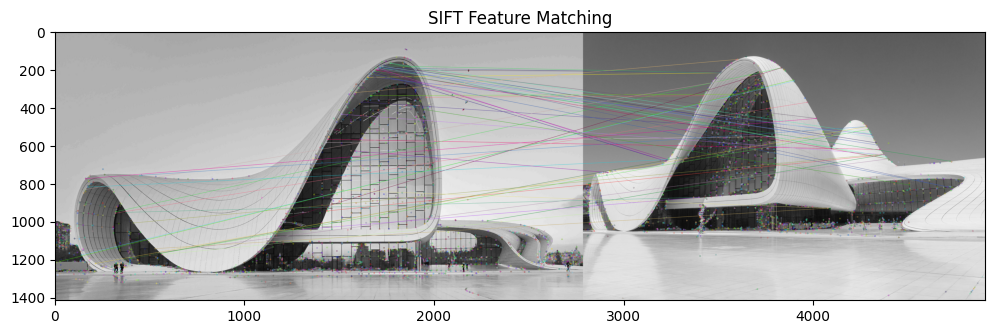

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the images & convert to grayscale
img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)

# #Resize iamges to the same height
height = min(img1.shape[0], img2.shape[0])
img1 = cv2.resize(img1, (int(img1.shape[1] * height / img1.shape[0]), height))
img2 = cv2.resize(img2, (int(img2.shape[1] * height / img2.shape[0]), height))

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Initialize BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches in ascending order by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], 
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                              
# display matches using Matplotlib
plt.figure(figsize = (12,8))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()

### Image Stitching using RANSAC and SIFT (15 marks)
SIFT and RANSAC can be used to create panoranic scense that we usually have as an ooption in our phones. Now you need to create that by stitching 2 images. We provided 3 groups of images each are a pair that you need to stitch as one image.

Steps to follow:
- Write a **function** to read the images and convert them to gray. The function should return the gray image, original, and RGB image. (1 mark)
- Extract SIFT descriptors from both images. (2 marks)
- Create a **matching function** that uses BFMatcher to find corresponding points between the two images and then filter the matches according to a certain threshold that the user can specify. (4 marks)
- Then you will need to use the provided function to show the matches on one image which is concatination of both images.(1 mark)
- Use ransac to find the inliers and the homography (H) needed. Play around with the threshold and number of iterations to get reasonably good output. Plot the matches. (3 marks)
- Then use the provided stitch function to get the stitched image (1 mark)
- You should do this process on all 3 pairs of images **(A_L , A_R ,B_L , B_R ,C_L , C_R)** (3 marks) 


In [ ]:
# Convert to gray function here
def convert_to_gray(img):
    gray_img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return gray_img, img, rgb_img

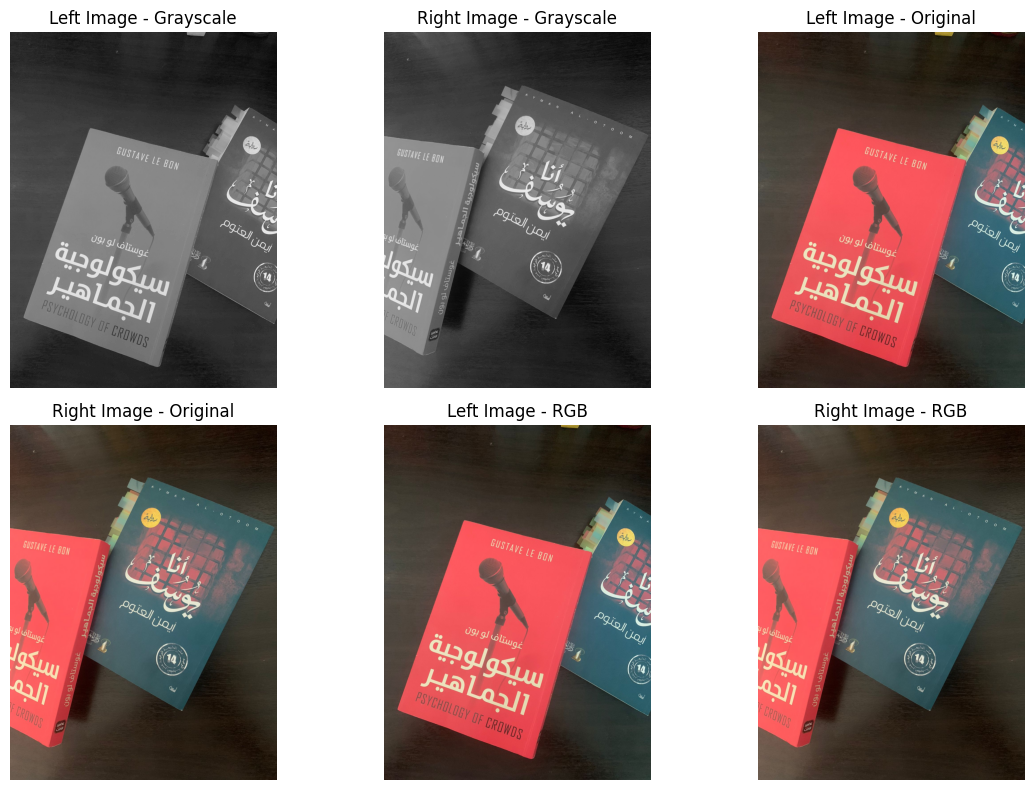

In [ ]:
# convert the images
imgA_L = cv2.imread("A_L.jpeg")
imgA_R = cv2.imread("A_R.jpeg")

imgB_L = cv2.imread("B_L.jpeg")
imgB_R = cv2.imread("B_R.jpeg")

imgC_L = cv2.imread("C_L.jpeg")
imgC_R = cv2.imread("C_R.jpeg")

# Convert images to grayscale
gray_imgAL, orig_imgAL, rgb_imgAL = convert_to_gray(imgA_L)
gray_imgAR, orig_imgAR, rgb_imgAR = convert_to_gray(imgA_R)

gray_imgBL, orig_imgBL, rgb_imgBL = convert_to_gray(imgB_L)
gray_imgBR, orig_imgBR, rgb_imgBR = convert_to_gray(imgB_R)

gray_imgCL, orig_imgCL, rgb_imgCL = convert_to_gray(imgC_L)
gray_imgCR, orig_imgCR, rgb_imgCR = convert_to_gray(imgC_R)


# Create figure for grayscale images
plt.figure(figsize=(12, 8))

# Left grayscale image
plt.subplot(231) 
plt.imshow(gray_imgAL, cmap='gray')
plt.title("Left Image - Grayscale")
plt.axis('off')

# Right grayscale image
plt.subplot(232)  
plt.imshow(gray_imgAR, cmap='gray')
plt.title("Right Image - Grayscale")
plt.axis('off')

# Left original image
plt.subplot(233)  
plt.imshow(cv2.cvtColor(orig_imgAL, cv2.COLOR_BGR2RGB))
plt.title("Left Image - Original")
plt.axis('off')

# Right original image
plt.subplot(234)  
plt.imshow(cv2.cvtColor(orig_imgAR, cv2.COLOR_BGR2RGB))
plt.title("Right Image - Original")
plt.axis('off')

# Left RGB image
plt.subplot(235)  
plt.imshow(rgb_imgAL)
plt.title("Left Image - RGB")
plt.axis('off')

# Right RGB image
plt.subplot(236) 
plt.imshow(rgb_imgAR)
plt.title("Right Image - RGB")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# SIFT descriptors on the gray images here
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray_img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_img2, None)



In [3]:
# ur matching function here

In [4]:
# plot matching function
def plot_matches(matches, total_img):
    match_img = total_img.copy()
    offset = total_img.shape[1]/2
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(match_img).astype('uint8')) #　RGB is integer type
    
    ax.plot(matches[:, 0], matches[:, 1], 'xr')
    ax.plot(matches[:, 2] + offset, matches[:, 3], 'xr')
     
    ax.plot([matches[:, 0], matches[:, 2] + offset], [matches[:, 1], matches[:, 3]],
            'r', linewidth=0.5)

    plt.show()

In [5]:
# use the plot_matches function here
# total_img is the concatinated image of left and right


In [ ]:
def homography(pairs):
    rows = []
    for i in range(pairs.shape[0]):
        p1 = np.append(pairs[i][0:2], 1)
        p2 = np.append(pairs[i][2:4], 1)
        row1 = [0, 0, 0, p1[0], p1[1], p1[2], -p2[1]*p1[0], -p2[1]*p1[1], -p2[1]*p1[2]]
        row2 = [p1[0], p1[1], p1[2], 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1], -p2[0]*p1[2]]
        rows.append(row1)
        rows.append(row2)
    rows = np.array(rows)
    U, s, V = np.linalg.svd(rows)
    H = V[-1].reshape(3, 3)
    H = H/H[2, 2] # standardize to let w*H[2,2] = 1
    return H

def random_point(matches, k=4):
    idx = random.sample(range(len(matches)), k)
    point = [matches[i] for i in idx ]
    return np.array(point)

def get_error(points, H):
    num_points = len(points)
    all_p1 = np.concatenate((points[:, 0:2], np.ones((num_points, 1))), axis=1)
    all_p2 = points[:, 2:4]
    estimate_p2 = np.zeros((num_points, 2))
    for i in range(num_points):
        temp = np.dot(H, all_p1[i])
        estimate_p2[i] = (temp/temp[2])[0:2] # set index 2 to 1 and slice the index 0, 1
    # Compute error
    errors = np.linalg.norm(all_p2 - estimate_p2 , axis=1) ** 2

    return errors

def ransac(matches, threshold, iters):
    num_best_inliers = 0
    
    for i in range(iters):
        points = random_point(matches)
        H = homography(points)
        
        #  avoid dividing by zero 
        if np.linalg.matrix_rank(H) < 3:
            continue
            
        errors = get_error(matches, H)
        idx = np.where(errors < threshold)[0]
        inliers = matches[idx]

        num_inliers = len(inliers)
        if num_inliers > num_best_inliers:
            best_inliers = inliers.copy()
            num_best_inliers = num_inliers
            best_H = H.copy()
            
    print("inliers/matches: {}/{}".format(num_best_inliers, len(matches)))
    return best_inliers, best_H

In [ ]:
# use the ransac function with different parameters here while also plotting the inliners using the plot_matches function



In [ ]:
def stitch_img(left, right, H):
    print("stiching image ...")
    
    # Convert to double and normalize. Avoid noise.
    left = cv2.normalize(left.astype('float'), None, 
                            0.0, 1.0, cv2.NORM_MINMAX)   
    # Convert to double and normalize.
    right = cv2.normalize(right.astype('float'), None, 
                            0.0, 1.0, cv2.NORM_MINMAX)   
    
    # left image
    height_l, width_l, channel_l = left.shape
    corners = [[0, 0, 1], [width_l, 0, 1], [width_l, height_l, 1], [0, height_l, 1]]
    corners_new = [np.dot(H, corner) for corner in corners]
    corners_new = np.array(corners_new).T 
    x_news = corners_new[0] / corners_new[2]
    y_news = corners_new[1] / corners_new[2]
    y_min = min(y_news)
    x_min = min(x_news)

    translation_mat = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])
    H = np.dot(translation_mat, H)
    
    # Get height, width
    height_new = int(round(abs(y_min) + height_l))
    width_new = int(round(abs(x_min) + width_l))
    size = (width_new, height_new)

    # right image
    warped_l = cv2.warpPerspective(src=left, M=H, dsize=size)

    height_r, width_r, channel_r = right.shape
    
    height_new = int(round(abs(y_min) + height_r))
    width_new = int(round(abs(x_min) + width_r))
    size = (width_new, height_new)
    

    warped_r = cv2.warpPerspective(src=right, M=translation_mat, dsize=size)
     
    black = np.zeros(3)  # Black pixel.
    
    # Stitching procedure, store results in warped_l.
    for i in tqdm(range(warped_r.shape[0])):
        for j in range(warped_r.shape[1]):
            pixel_l = warped_l[i, j, :]
            pixel_r = warped_r[i, j, :]
            
            if not np.array_equal(pixel_l, black) and np.array_equal(pixel_r, black):
                warped_l[i, j, :] = pixel_l
            elif np.array_equal(pixel_l, black) and not np.array_equal(pixel_r, black):
                warped_l[i, j, :] = pixel_r
            elif not np.array_equal(pixel_l, black) and not np.array_equal(pixel_r, black):
                warped_l[i, j, :] = (pixel_l + pixel_r) / 2
            else:
                pass
                  
    stitch_image = warped_l[:warped_r.shape[0], :warped_r.shape[1], :]
    return stitch_image

In [ ]:
# use the stitching function on the rgb version of your image
